1. Nettoyage & Préparation des Données

In [7]:
import pandas as pd

# Chargement des données
df = pd.read_csv('data.csv', delimiter=',')

# Nettoyage :
# - Conversion des pourcentages en numérique
df['% Estimation'] = df['% Estimation'].str.replace('%', '').astype(float) / 100

# - Gestion des valeurs manquantes/NA
df.fillna({'Remarques': 'Aucune remarque', 'Preuves': 'Aucune preuve'}, inplace=True)

# - Vérification des doublons
print(f"Doublons détectés : {df.duplicated().sum()}")

Doublons détectés : 0


2. Analyse Descriptive

a) Statistiques Globales

In [8]:
# Distribution des scores (% Estimation)
print(df['% Estimation'].describe())

# Top 5 des critères les mieux/peu notés
top5 = df.nlargest(5, '% Estimation')
bottom5 = df.nsmallest(5, '% Estimation')

count    50.000000
mean      0.440000
std       0.307889
min       0.000000
25%       0.200000
50%       0.500000
75%       0.700000
max       0.950000
Name: % Estimation, dtype: float64


b) Visualisations Clés

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_17060\4155684542.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Champ', y='% Estimation', palette='viridis')


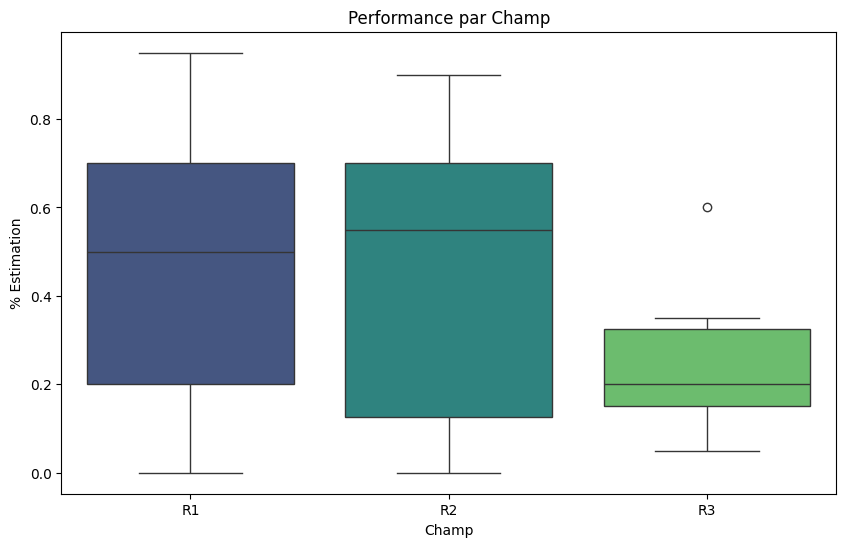

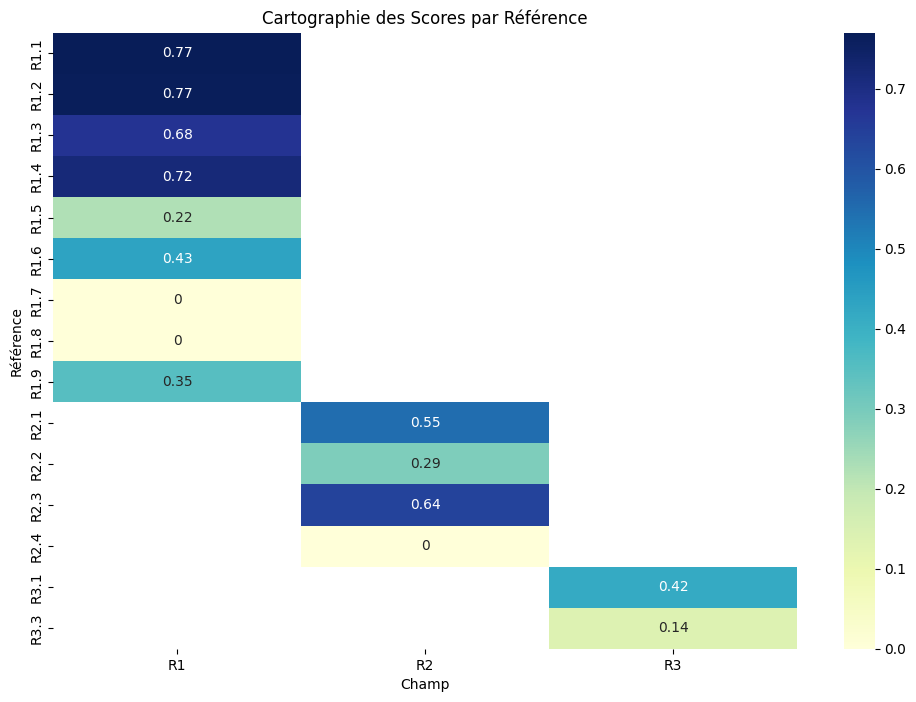

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des scores par Champ (R1, R2, R3)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Champ', y='% Estimation', palette='viridis')
plt.title('Performance par Champ')
plt.show()

# Heatmap des scores par Référence (ex: R1.1, R1.2)
pivot_table = df.pivot_table(index='Référence', columns='Champ', values='% Estimation', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Cartographie des Scores par Référence')
plt.show()

3. Analyse Thématique

a) Priorisation des Axes Faibles

In [10]:
# Critères sous un seuil critique (ex: <50%)
axes_faibles = df[df['% Estimation'] < 0.5][['Code Critère', 'Critères', '% Estimation', 'Remarques']]
print(axes_faibles.sort_values('% Estimation'))

   Code Critère                                           Critères  \
42       R2.4.1  Établissement d'une politique de communication...   
34       R2.2.3       Mise en œuvre et évaluation des partenariats   
32       R2.2.1         Définition d'une stratégie de partenariats   
22       R1.7.1  Établissement d'une politique de formation à l...   
23       R1.7.2    L'établissement encourage les jeunes chercheurs   
24       R1.7.3              L'établissement soutient l'innovation   
25       R1.8.1  Politique documentaire adaptée aux besoins des...   
26       R1.8.2        Mise en place d'un fond documentaire adapté   
50       R3.3.4  Organisation d'activités de diffusion des trav...   
48       R3.3.2  Utilisation des réseaux sociaux pour la diffus...   
29       R2.1.1  Mutualisation des équipements via services com...   
15       R1.5.1  Mise en place de mécanismes d'identification d...   
35       R2.2.4     Association des partenaires aux manifestations   
17       R1.5.3  Org

b) Analyse des Remarques (NLP)

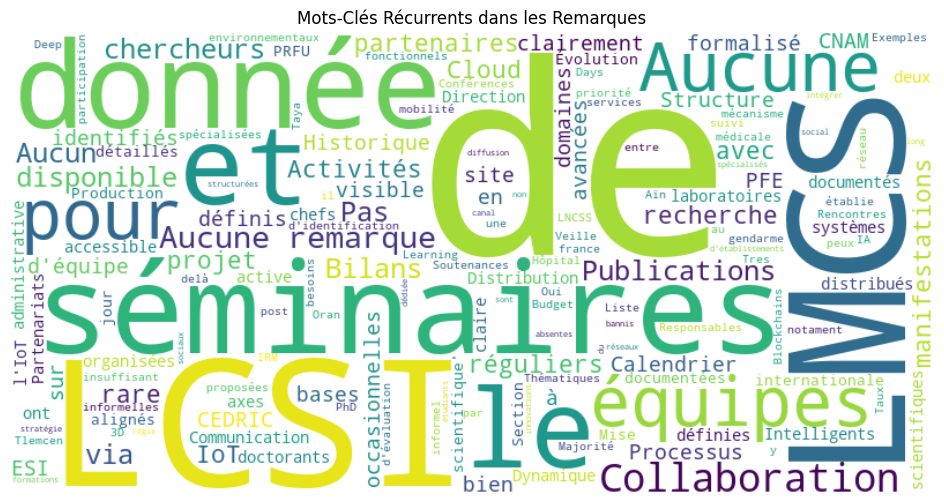

In [13]:
from wordcloud import WordCloud

# Nuage de mots des Remarques
text = ' '.join(df['Remarques'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots-Clés Récurrents dans les Remarques')
plt.show()

4. Analyse Comparative

a) Benchmarking Interne

In [14]:
# Comparaison R1 vs R2 vs R3
performance_par_champ = df.groupby('Champ')['% Estimation'].mean().sort_values(ascending=False)
print(performance_par_champ)

Champ
R1    0.479310
R2    0.450000
R3    0.257143
Name: % Estimation, dtype: float64


b) Corrélations

<Axes: >

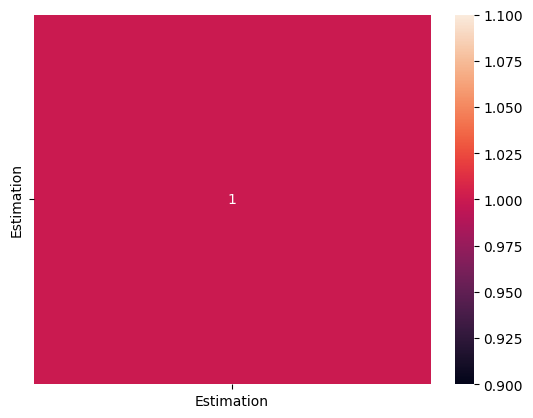

In [17]:
# Renommer les colonnes pour enlever les caractères spéciaux
df_renamed = df.rename(columns={'% Estimation': 'Estimation'})

# Vérifier si la colonne 'AutreColQuant' existe avant de calculer la matrice de corrélation
if 'AutreColQuant' in df_renamed.columns:
	# Matrice de corrélation entre critères (si données quantitatives supplémentaires)
	corr_matrix = df_renamed[['Estimation', 'AutreColQuant']].corr()
else:
	# Matrice de corrélation avec seulement la colonne 'Estimation'
	corr_matrix = df_renamed[['Estimation']].corr()

sns.heatmap(corr_matrix, annot=True)